#Loading Libraries

In [7]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Importing os for managing data file.

Importing pandas library to read csv file, to convert dataframe, managing dataset.

Importing train_test_split from sklearn model_selection library to split training and test data.

Importing


*   LinearRegression, LogisticRegression from sklearn linear model
*   MLPClassifier from sklearn neural_network
*   GradientBoostingRegressor, GradientBoostingClassifier from sklearn ensemble
*   Support Vector Regression from sklearn svm

for training model.

Importing MSE, MAE, accuracy, precision, recall and confusion matrix from sklearn metrics to compare performance of the models.

Importing matplotlib and seaborn for visualization with graph.
Importing numpy for mathematical function.

#Data Preparation

In [8]:
# get file path
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

#read file
temp_df = pd.read_csv('house_price_regression_dataset.csv')

print("Dataset shape:", temp_df.shape)

#print dataframe
print(temp_df.head())

Dataset shape: (1000, 8)
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


Getting data from csv file.

Convert to dataframe using pandas lib.

#Preprocessing Data

In [9]:
# Remove any rows with missing information.
df = temp_df.dropna()

# Remove all duplicate rows.
df = df.drop_duplicates()

# Create a binary target for classification:
# Houses above the median price are labeled as 1 ("expensive") and those at or below as 0 ("affordable")
median_price = df['House_Price'].median()
df["price_category"] = (df['House_Price'] > median_price).astype(int)

# Define features and target variables
featuresX = df.drop(columns=['House_Price','price_category'], axis=1)
target_class_y = df['price_category']
target_reg_y = df['House_Price']

#split 80% training data and 20% test data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(featuresX, target_reg_y,test_size=0.2, random_state=42)
print("X_train reg - ",X_train_reg.shape)
print("X_test reg - ",X_test_reg.shape)
print("y_train reg - ",y_train_reg.shape)
print("y_test reg - ",y_test_reg.shape)

#split 80% training data and 20% test data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(featuresX, target_class_y,test_size=0.2, random_state=42)
print("X_train reg - ",X_train_class.shape)
print("X_test reg - ",X_test_class.shape)
print("y_train reg - ",y_train_class.shape)
print("y_test reg - ",y_test_class.shape)

X_train reg -  (800, 7)
X_test reg -  (200, 7)
y_train reg -  (800,)
y_test reg -  (200,)
X_train reg -  (800, 7)
X_test reg -  (200, 7)
y_train reg -  (800,)
y_test reg -  (200,)


1. Removing rows with null values if any

2. Removing row with duplicate values if any

3. Creating binary target for classificaiton tasks using regression target "House Price" median value.

4. Defining features and targets for regression and classification.

5. Splitting training data (80%) and test data (20%)

#Model Deployment (Regression models)


Regression Model Performance:

Linear Regression - MSE: 101434798.51, MAE: 8174.58, RMSE: 10071.48 



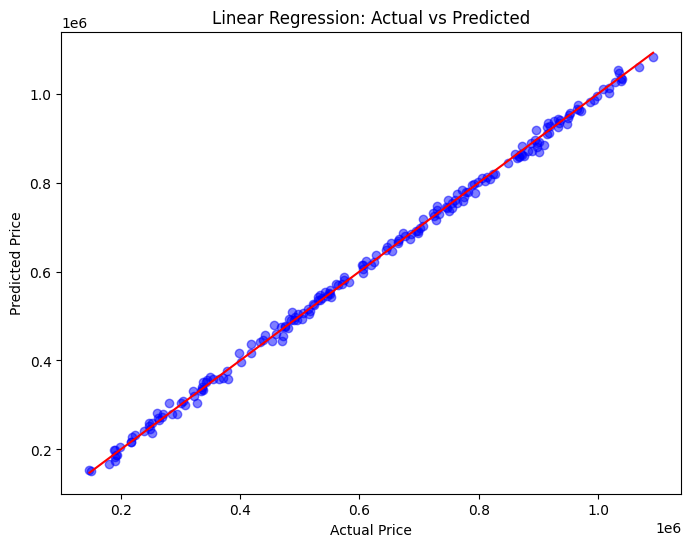


Gradient Boosting Regressor - MSE: 224965597.85, MAE: 12305.22, RMSE: 14998.85 



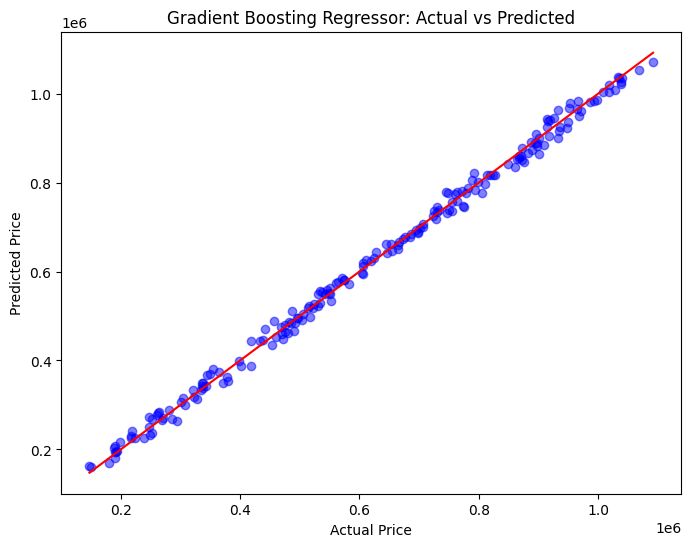


Support Vector Regressor - MSE: 753920455.15, MAE: 22269.89, RMSE: 27457.61 



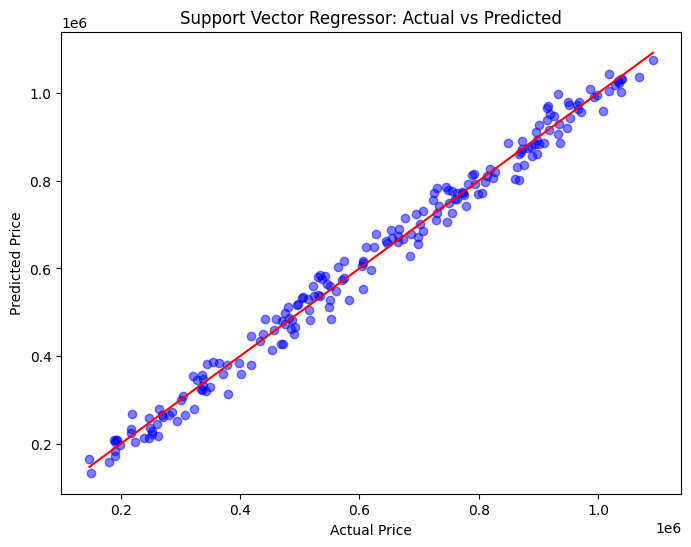

In [10]:
# --- Regression Models ---
# Define three regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, max_depth=3, random_state=42),
    "Support Vector Regressor": SVR(kernel='linear', C=1.0, epsilon=0.01)
}

reg_results = {}

print("\nRegression Model Performance:")
for name, model in regression_models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred)
    mae = mean_absolute_error(y_test_reg, y_pred)
    print(f"\n{name} - MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {np.sqrt(mse):.2f} \n")
    reg_results[name] = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": np.sqrt(mse)
    }
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_reg, y_pred, alpha=0.5, color='blue',label='Actual data')
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', label='Predicted line')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{name}: Actual vs Predicted")
    plt.show()



- Declare 3 algorithms (Linear Regression, Gradient Boosting Regressor, Support Vector Regressor) for regression task.
- Train each approach and print the MAE, MSE and RMSE results for each approach.
- Generate a visualization with a scatter plot for each approach.

#Model Deployment (Classification models)


Classification Model Performance:
Logistic Regression
Accuracy: 99.50%
Precision: 98.99%
Recall: 100.00%
Specificity: 99.02%
Confusion Matrix:
TN - 101, FP - 1, FN - 0, TP - 98


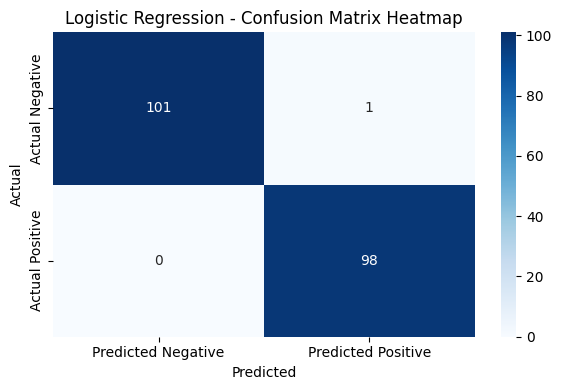

Gradient Boosting Classifier
Accuracy: 98.00%
Precision: 96.08%
Recall: 100.00%
Specificity: 96.08%
Confusion Matrix:
TN - 98, FP - 4, FN - 0, TP - 98


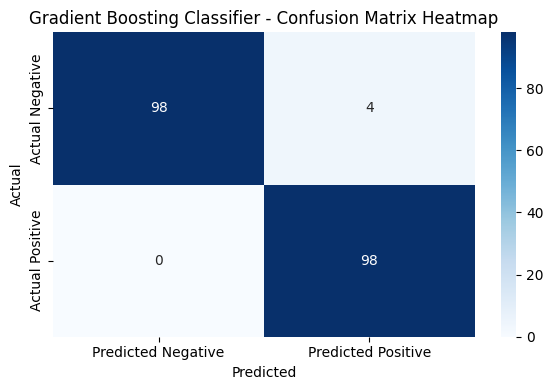

Neural Network (MLPClassifier)
Accuracy: 97.50%
Precision: 95.15%
Recall: 100.00%
Specificity: 95.10%
Confusion Matrix:
TN - 97, FP - 5, FN - 0, TP - 98


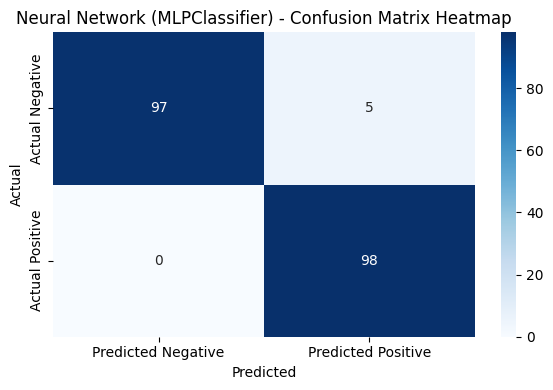

In [15]:
# --- Classification Models ---

# Define three classification models
clf_models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Neural Network (MLPClassifier)": MLPClassifier(hidden_layer_sizes=(100,10), max_iter=5000)
}

clf_results = {}

print("\nClassification Model Performance:")
for name, model in clf_models.items():
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    # Calculate accuracy
    acc = accuracy_score(y_test_class, y_pred)
    print(name);
    print(f"Accuracy: {acc:.2%}")
    clf_results[name] = {
        "Accuracy": acc * 100
    }
    # Calculate precision (for positive class 1)
    precision = precision_score(y_test_class, y_pred)
    print(f"Precision: {precision:.2%}")
    # Calculate recall (True Positive Rate / Sensitivity)
    recall = recall_score(y_test_class, y_pred)
    print(f"Recall: {recall:.2%}")
    # Confusion matrix to calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test_class, y_pred).ravel()
    specificity = tn / (tn + fp)
    print(f'Specificity: {specificity:.2%}')

    print("Confusion Matrix:")
    print(f'TN - {tn}, FP - {fp}, FN - {fn}, TP - {tp}')

    cm = confusion_matrix(y_test_class, y_pred)
    # Create a heat map using seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'{name} - Confusion Matrix Heatmap')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

- Declare 3 algorithms (Logistic RegressionC, Gradient Boosting Classifier, Neural Network (MLPClassifier)) for classification task.
- Train each approach and print the Accuracy, Recall, Precision and Specificity results for each approach.
- Generate a visualization of confusion matriz with a heatmap for each approach.

#Results

Regression Model Comparison


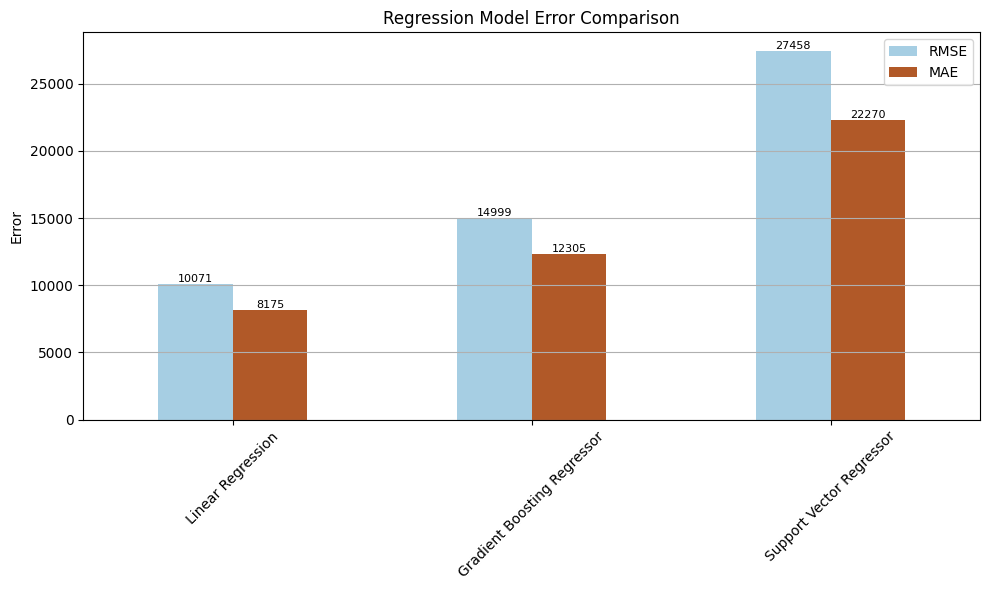


Classification Model Comparison


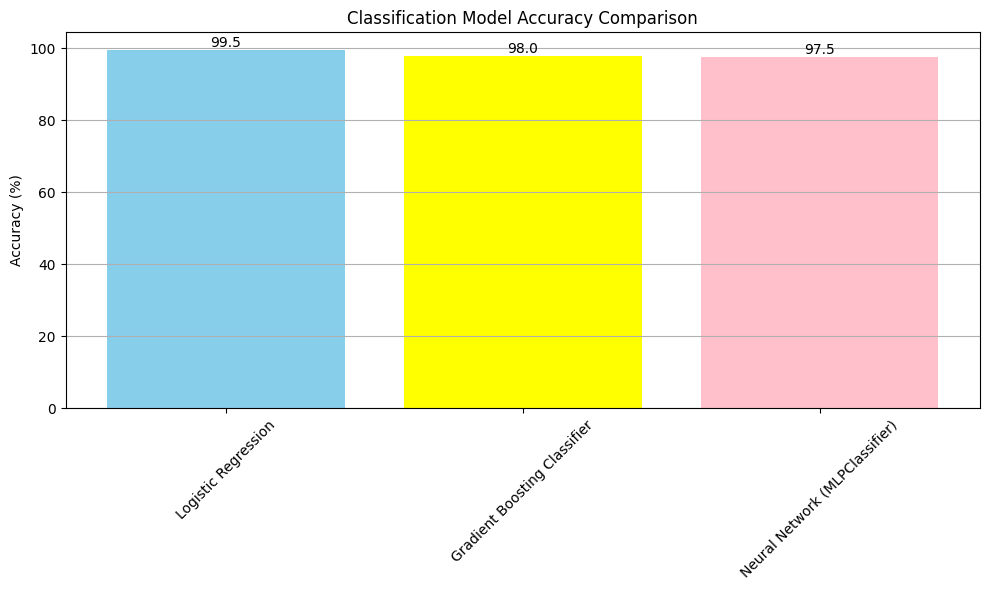

In [16]:
print('Regression Model Comparison')
# Convert dict to DataFrame
#print(reg_results)
df_reg = pd.DataFrame(reg_results).T  # Transpose so models are rows
#print(df_reg)

# Plot only MSE and MAE
ax = df_reg[['RMSE', 'MAE']].plot(kind='bar', figsize=(10, 6), colormap='Paired')

# Labels and formatting
plt.title("Regression Model Error Comparison")
plt.ylabel("Error")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

plt.show()

print('\nClassification Model Comparison')
#print(clf_results)
# Create DataFrame and transpose so that models become rows
df_clf = pd.DataFrame(clf_results).T

# Extract model names and accuracy values
models = df_clf.index.tolist()
accuracy = df_clf['Accuracy'].values

# Define a list of colors for each model (one color per bar)
colors = ['skyblue', 'yellow', 'pink']

# Create a bar chart using plt.bar
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy, color=colors)

# Add labels and formatting
plt.title("Classification Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Outcome
Regression


3 models are trained for regression task. Based on the result above, Linear Regression performs best on this dataset. It indicates that the relationship between features and target is largely linear. More complex models like Gradient Boosting and SVR did not provide any advantage and, in the case of SVR, underperformed significantly.


Classification

models are trained for classification task. Based on the result above, Logistic Regression demonstrates the highest accuracy and the fewest misclassifications. It indicates that Logistic Regression is the most reliable model for this dataset. Although both Gradient Boosting and the Neural Network provide competitive accuracy, they tend to make more errors, particularly in misclassifying negative cases or missing positives. These issues could potentially be addressed with further tuning.
